# Weather Scenario Data Validation

This notebook plots daily values for each weather scenario (openfield, underpv_high, underpv_medium, underpv_low) to confirm the values are correct. Each scenario has a consistent color across all plots.

**Note:** The source data does not include humidity—only temp_max, temp_min, solar irradiance, wind speed, and precipitation are available.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Paths
WEATHER_DIR = Path("../weather")
PLOT_YEAR = 2015  # Show one year of data for clearer visualization
SCENARIOS = [
    "openfield",
    "underpv_low",
    "underpv_medium",
    "underpv_high",
]

openfield: 5479 rows, 2010-01-01 00:00:00 to 2024-12-31 00:00:00
underpv_low: 5479 rows, 2010-01-01 00:00:00 to 2024-12-31 00:00:00
underpv_medium: 5479 rows, 2010-01-01 00:00:00 to 2024-12-31 00:00:00
underpv_high: 5479 rows, 2010-01-01 00:00:00 to 2024-12-31 00:00:00


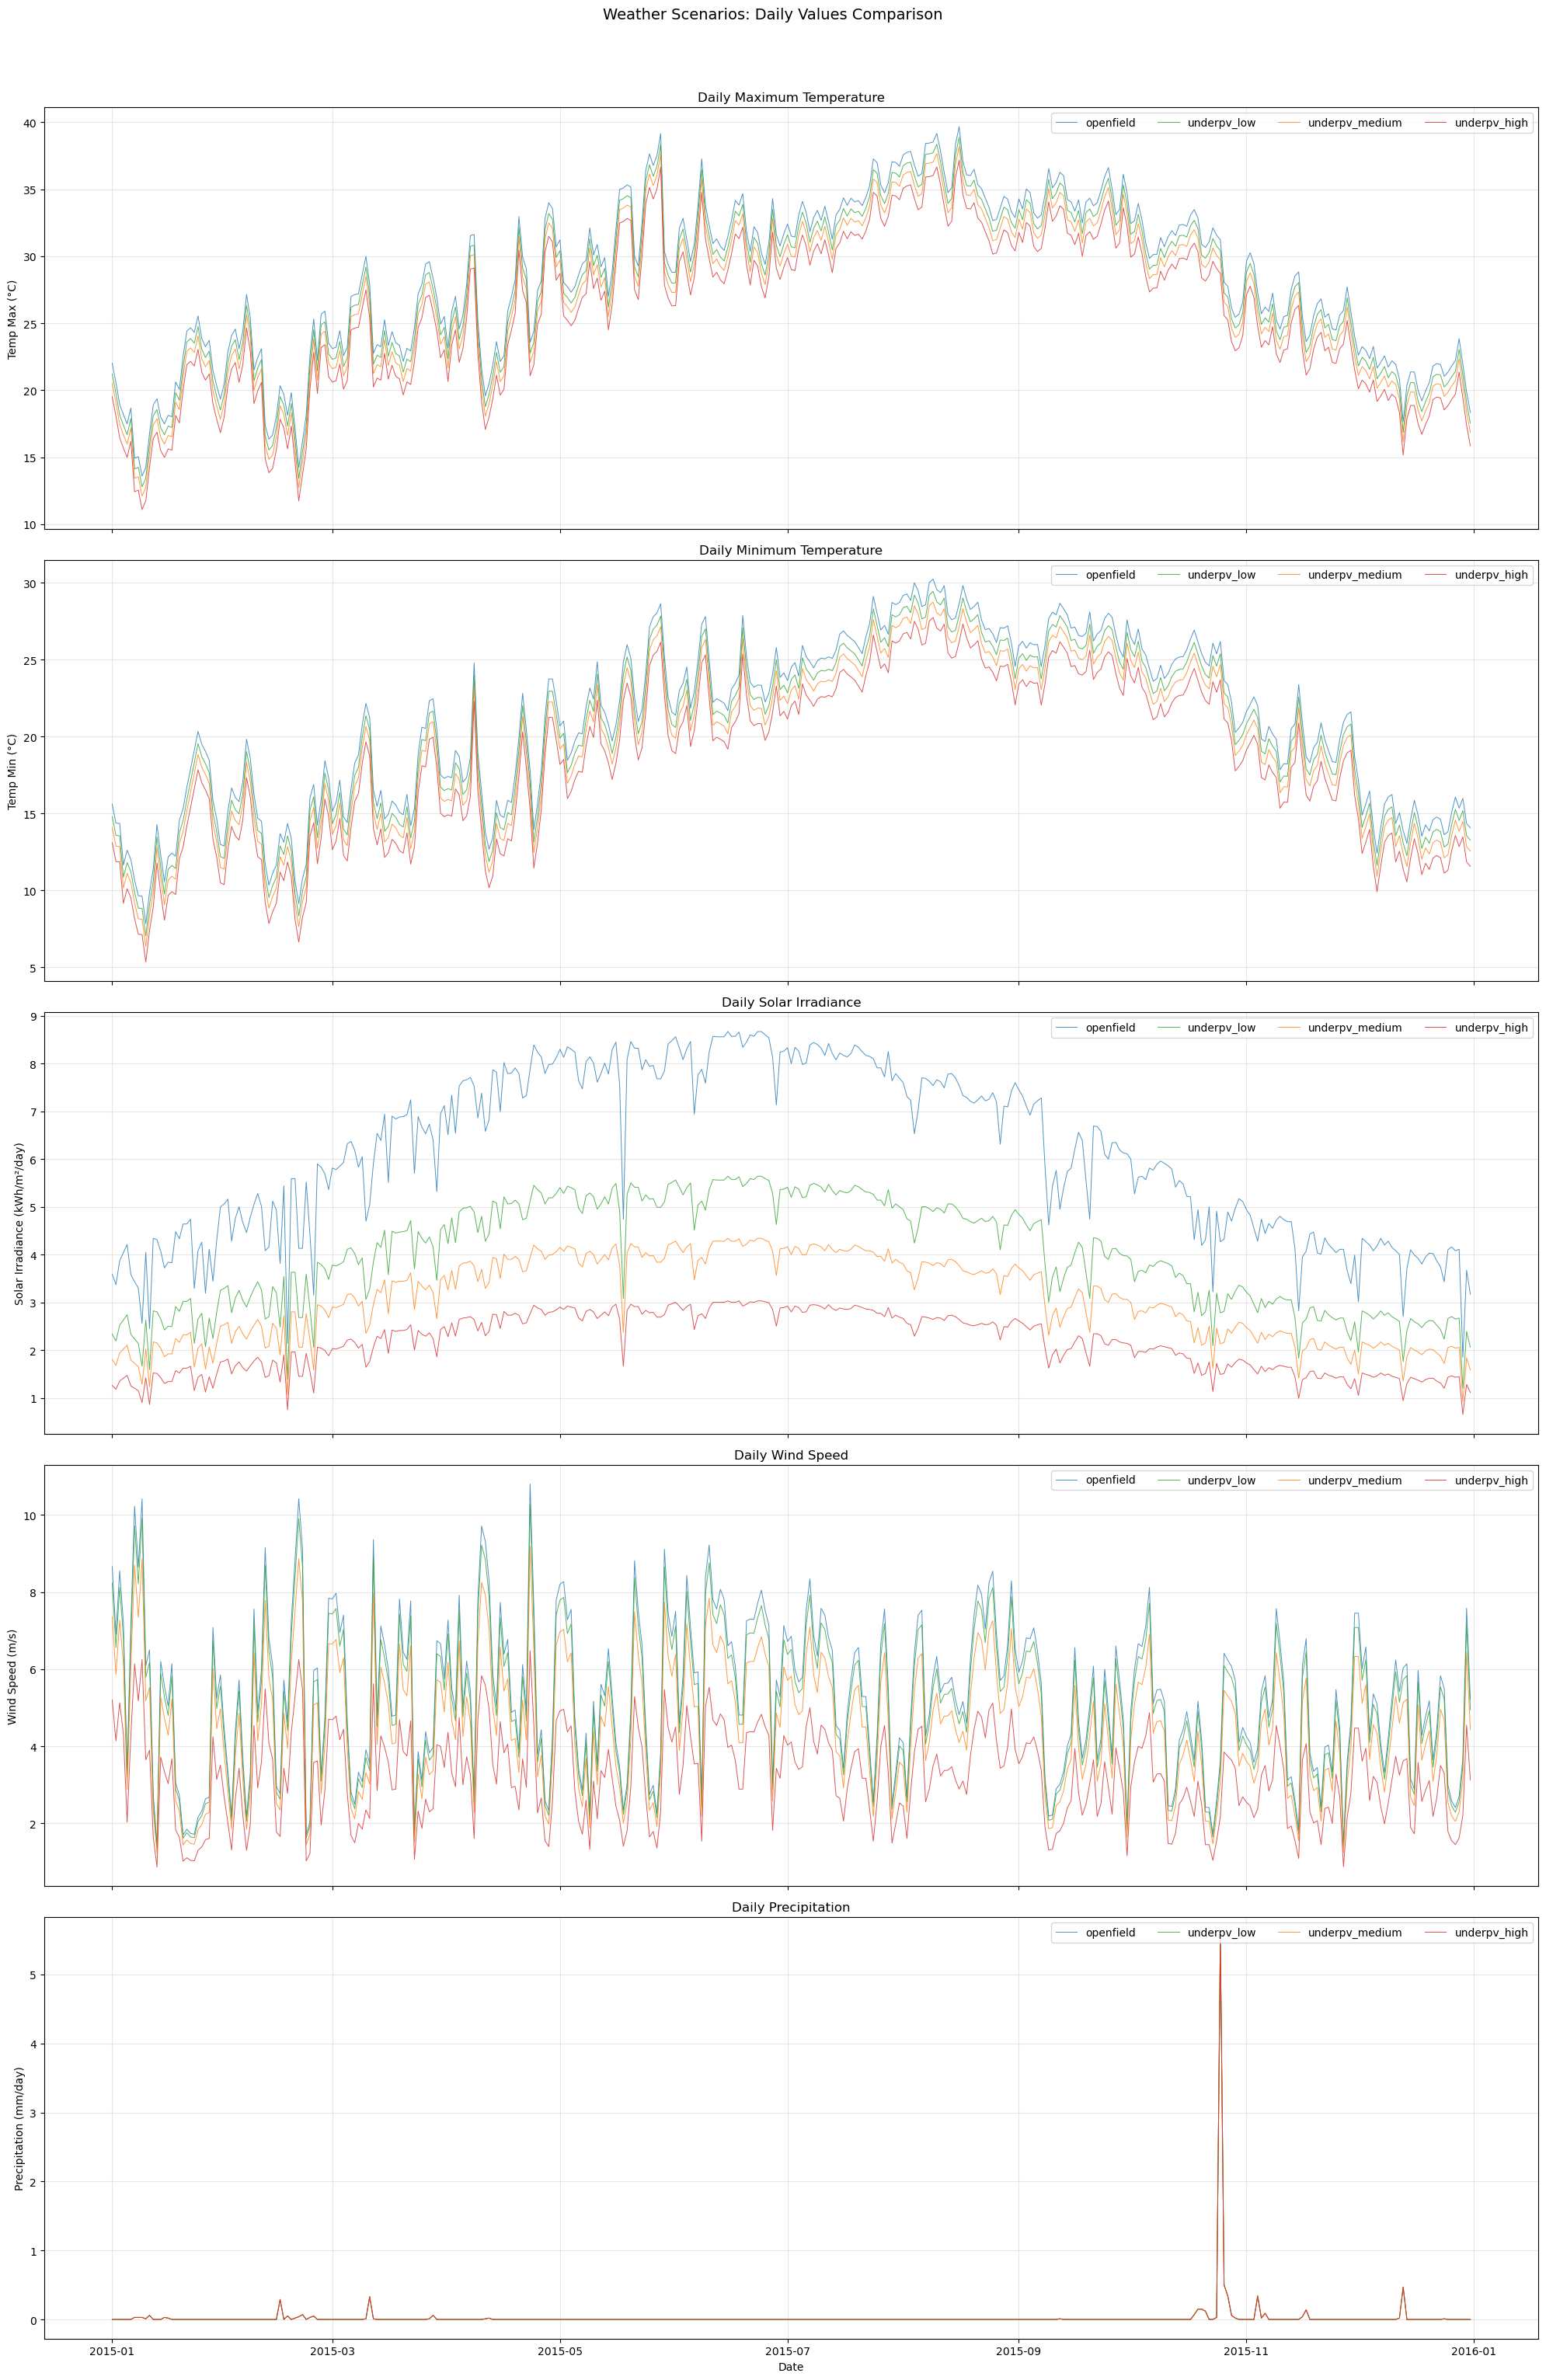

In [2]:
# Consistent colors for each scenario across all plots
COLORS = {
    "openfield": "#1f77b4",      # blue (baseline)
    "underpv_low": "#2ca02c",    # green
    "underpv_medium": "#ff7f0e",  # orange
    "underpv_high": "#d62728",    # red
}

# Load all scenario data
dfs = {}
for scenario in SCENARIOS:
    fpath = WEATHER_DIR / f"daily_weather_{scenario}-research.csv"
    df = pd.read_csv(fpath, comment="#", parse_dates=["date"])
    dfs[scenario] = df
    print(f"{scenario}: {len(df)} rows, {df['date'].min()} to {df['date'].max()}")

# Plot variables: (column, ylabel, title)
PLOT_VARS = [
    ("temp_max_c", "Temp Max (°C)", "Daily Maximum Temperature"),
    ("temp_min_c", "Temp Min (°C)", "Daily Minimum Temperature"),
    ("solar_irradiance_kwh_m2", "Solar Irradiance (kWh/m²/day)", "Daily Solar Irradiance"),
    ("wind_speed_ms", "Wind Speed (m/s)", "Daily Wind Speed"),
    ("precip_mm", "Precipitation (mm/day)", "Daily Precipitation"),
]

fig, axes = plt.subplots(len(PLOT_VARS), 1, figsize=(20, 6 * len(PLOT_VARS)), sharex=True)
if len(PLOT_VARS) == 1:
    axes = [axes]

for ax, (col, ylabel, title) in zip(axes, PLOT_VARS):
    for scenario in SCENARIOS:
        df = dfs[scenario]
        df_plot = df[df["date"].dt.year == PLOT_YEAR]
        ax.plot(df_plot["date"], df_plot[col], color=COLORS[scenario], label=scenario, alpha=0.8, linewidth=0.7)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend(loc="upper right", ncol=4)
    ax.grid(True, alpha=0.3)

axes[-1].set_xlabel("Date")
plt.suptitle("Weather Scenarios: Daily Values Comparison", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

## Summary statistics

Quick check: mean values per scenario for each variable.

In [3]:
summary = pd.DataFrame({
    scenario: dfs[scenario][dfs[scenario]["date"].dt.year == PLOT_YEAR][[c for c, _, _ in PLOT_VARS]].mean()
    for scenario in SCENARIOS
})
summary.index = [ylabel for _, ylabel, _ in PLOT_VARS]
summary.round(3)

,openfield,underpv_low,underpv_medium,underpv_high
Temp Max (°C),28.353,27.553,26.853,25.853
Temp Min (°C),20.945,20.145,19.445,18.445
Solar Irradiance (kWh/m²/day),6.160,4.004,3.080,2.156
Wind Speed (m/s),5.323,5.057,4.524,3.194
Precipitation (mm/day),0.026,0.026,0.026,0.026
